# Case Study

In [133]:
#imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import hvplot.pandas
import plotly.express as px
import matplotlib.pyplot as plt


Bad key savefig.frameon in file C:\Users\Alex\anaconda3\envs\pyvizenv2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\Alex\anaconda3\envs\pyvizenv2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\Alex\anaconda3\envs\pyvizenv2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [134]:
#import and clean raw data

from pathlib import Path

data_path = Path('../Resources/Assignment Data (Quant Strategist - Los Angelesl).csv')
raw_data = pd.read_csv(data_path, header=3, index_col='Date')
raw_data = df.loc[:, ~df.columns.str.contains('^Unnamed')]
raw_data.dropna(inplace=True)
raw_data.index = pd.to_datetime(raw_data.index)

In [135]:
data = raw_data.assign(x=raw_data['Gold Price Index']/raw_data['Copper Price Index'].values)

In [136]:
data = raw_data
data['Gold/Copper Index'] = data['Gold Price Index'] / data['Copper Price Index']

In [137]:
data.head()

,Gold Price Index,Copper Price Index,Gold Excess Return Index (Excess of Cash),Copper Excess Return Index (Excess of Cash),"United States 10 Year Treasury Note, Constant Maturity, Total Return Index","United States 30 Year Treasury Bond, Constant Maturity, Total Return Index",Treasury Repo Rate,"United States 10 Year Treasury Note, Constant Maturity, Excess Return Index (Excess of Cash)","United States 30 Year Treasury Bond, Constant Maturity, Excess Return Index (Excess of Cash)",United States 10 year Treasury Mid Yield,United States 30 year Treasury Mid Yield,United States 10 year Treasury Modified Duration,United States 30 year Treasury Modified Duration,Gold/Copper Index
Date,,,,,,,,,,,,,,
2000-06-09,290.78,80.37,44.94,111.00,261.12,283.57,6.64,100.00,100.00,6.12,5.89,7.01,13.78,3.618017
2000-06-12,293.22,80.11,45.35,110.57,261.86,283.99,6.65,100.26,100.12,6.08,5.88,7.01,13.78,3.660217
2000-06-13,291.98,80.86,45.20,111.54,261.48,281.52,6.65,100.09,99.23,6.10,5.94,7.00,13.71,3.610932
2000-06-14,297.83,81.72,46.14,112.63,262.54,282.70,6.58,100.47,99.62,6.05,5.91,7.01,13.74,3.644518
2000-06-15,295.69,82.54,45.81,113.77,262.62,282.20,6.65,100.47,99.42,6.05,5.93,7.01,13.73,3.582384


In [138]:
data.hvplot(x='Date', y=['Gold/Copper Index', 'United States 10 year Treasury Mid Yield'])


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [139]:
for col in data.columns:
    print(col)
    


Gold Price Index
Copper Price Index
Gold Excess Return Index (Excess of Cash)
Copper Excess Return Index  (Excess of Cash)
United States 10 Year Treasury Note, Constant Maturity, Total Return Index
United States 30 Year Treasury Bond, Constant Maturity, Total Return Index 
Treasury Repo Rate
United States 10 Year Treasury Note, Constant Maturity, Excess Return Index (Excess of Cash)
United States 30 Year Treasury Bond, Constant Maturity, Excess Return Index (Excess of Cash)
United States 10 year Treasury Mid Yield
United States 30 year Treasury Mid Yield
United States 10 year Treasury Modified Duration
United States 30 year Treasury Modified Duration
Gold/Copper Index


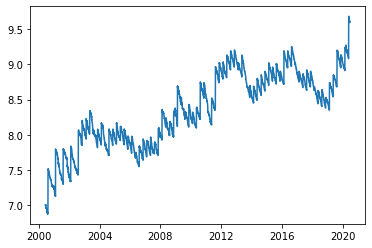

In [141]:
#data["United States 30 Year Treasury Bond, Constant Maturity, Total Return Index"].dtypes
for col in data.columns:
    col = col.replace(',', '')
    

In [142]:
print(data.iloc[0])

Gold Price Index                                                                                290.780000
Copper Price Index                                                                               80.370000
Gold Excess Return Index (Excess of Cash)                                                        44.940000
Copper Excess Return Index  (Excess of Cash)                                                    111.000000
United States 10 Year Treasury Note, Constant Maturity, Total Return Index                      261.120000
United States 30 Year Treasury Bond, Constant Maturity, Total Return Index                      283.570000
Treasury Repo Rate                                                                                6.640000
United States 10 Year Treasury Note, Constant Maturity, Excess Return Index (Excess of Cash)    100.000000
United States 30 Year Treasury Bond, Constant Maturity, Excess Return Index (Excess of Cash)    100.000000
United States 10 year Treasury Mid Yi

In [122]:
#correlation matrix
corrM = data.corr()
corrM

,Gold Price Index,Copper Price Index,Gold Excess Return Index (Excess of Cash),Copper Excess Return Index (Excess of Cash),"United States 10 Year Treasury Note, Constant Maturity, Total Return Index","United States 30 Year Treasury Bond, Constant Maturity, Total Return Index",Treasury Repo Rate,"United States 10 Year Treasury Note, Constant Maturity, Excess Return Index (Excess of Cash)","United States 30 Year Treasury Bond, Constant Maturity, Excess Return Index (Excess of Cash)",United States 10 year Treasury Mid Yield,United States 30 year Treasury Mid Yield,United States 10 year Treasury Modified Duration,United States 30 year Treasury Modified Duration,Gold/Copper Index
Gold Price Index,1.000000,0.780404,0.995614,0.708851,0.903146,0.838313,-0.596361,0.868683,0.806529,-0.877842,-0.843107,0.872856,0.863283,0.486765
Copper Price Index,0.780404,1.000000,0.802706,0.990298,0.561758,0.460688,-0.257655,0.485743,0.405829,-0.479630,-0.455983,0.511469,0.492849,-0.135622
Gold Excess Return Index (Excess of Cash),0.995614,0.802706,1.000000,0.738466,0.867853,0.792047,-0.603272,0.833177,0.759581,-0.858153,-0.807990,0.855629,0.826131,0.445753
Copper Excess Return Index (Excess of Cash),0.708851,0.990298,0.738466,1.000000,0.466260,0.360682,-0.192673,0.383993,0.302892,-0.393514,-0.364324,0.426901,0.403330,-0.222876
"United States 10 Year Treasury Note, Constant Maturity, Total Return Index",0.903146,0.561758,0.867853,0.466260,1.000000,0.981760,-0.590449,0.991754,0.970004,-0.944894,-0.971415,0.931166,0.973873,0.653139
"United States 30 Year Treasury Bond, Constant Maturity, Total Return Index",0.838313,0.460688,0.792047,0.360682,0.981760,1.000000,-0.501864,0.981315,0.996412,-0.912783,-0.975971,0.891421,0.976678,0.692403
Treasury Repo Rate,-0.596361,-0.257655,-0.603272,-0.192673,-0.590449,-0.501864,1.000000,-0.606730,-0.495880,0.722124,0.553891,-0.713395,-0.526738,-0.600496
"United States 10 Year Treasury Note, Constant Maturity, Excess Return Index (Excess of Cash)",0.868683,0.485743,0.833177,0.383993,0.991754,0.981315,-0.606730,1.000000,0.980014,-0.952709,-0.977674,0.936963,0.971899,0.693714
"United States 30 Year Treasury Bond, Constant Maturity, Excess Return Index (Excess of Cash)",0.806529,0.405829,0.759581,0.302892,0.970004,0.996412,-0.495880,0.980014,1.000000,-0.908870,-0.976389,0.885910,0.971073,0.712219
United States 10 year Treasury Mid Yield,-0.877842,-0.479630,-0.858153,-0.393514,-0.944894,-0.912783,0.722124,-0.952709,-0.908870,1.000000,0.959996,-0.969204,-0.931187,-0.733193
